Test the effects of having two candidates of the same party in the general election

How it should have the effect: When candidates of both parties are on the ballot and voters can only vote for one candidate, partisans of one party will ignore all the candidates of the opposite party. However, if all candidates from their party get eliminated in the first round, then they will generally choose the candidate from the opposite party who is most like their party, which is generally the more moderate one.

This exploration examines two factors that would affect the change in vote share between the two candidates from the first round to the second. The first is the difference in ideology between the two, measured by Adam Bonica's DIME score, indicating how much reason there is for a voter from the opposite party to choose one over the other. The other is the share of voters in the first stage who voted for one of the candidates from the opposite party, indicating how many voters would be looking specifically for concessions to the other party.

Null hypothesis: Both variables would have no effect on changes in performance of the two candidates relative to each other between the first and second stages of the election.

Alternate hypothesis: A combination of the two variables will cause the moderate to perform better in the second stage than in the first, with 95% probability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
vote = pd.read_csv("dataset.csv", sep=';')
vote.head(5)

,Year,OType,District,Party,Cand1,Cand2,Gen1,Gen2,Pri1,Pri2,Opp,PriTotal,PriOpp,DIME1,DIME2
0,2012,Assembly,1,REP,Brian Dahle,Rick Bosetti,116098,60920,41384,34457,Y,120845,31120,0.297,0.572
1,2012,Assembly,5,REP,Frank Bigelow,Rico Oller,82293,75071,29584,34673,Y,102287,31721,0.389,0.548
2,2012,Assembly,10,DEM,Michael Allen,Marc Levine,91973,96421,32922,25920,Y,106351,22708,-0.992,-0.503
3,2012,Assembly,18,DEM,Rob Bonta,Abel Guillen,75865,74422,23007,18521,Y,62290,9082,-0.933,-1.204
4,2012,Assembly,19,DEM,Phil Ting,Michael Breyer,92858,66200,38432,14991,Y,68144,11646,-0.887,-0.862


Show the minimum and maximum DIME scores for both parties

In [3]:
for cl in 'DIME1', 'DIME2':
    print("The lowest Republican score is {}".format(vote.loc[vote.Party == 'REP'][cl].min()))
    print("The highest Democratic score is {}".format(vote.loc[vote.Party == 'DEM'][cl].max()))

The lowest Republican score is 0.297
The highest Democratic score is -0.511
The lowest Republican score is 0.088
The highest Democratic score is -0.503


Calculate share of the two-candidate vote in both elections, the change between the elections and the difference in DIME scores

In [4]:
vote['GenShare'] = vote.Gen1 / (vote.Gen1 + vote.Gen2)
vote['PriShare'] = vote.Pri1 / (vote.Pri1 + vote.Pri2)
vote['VoteChange'] = vote.GenShare - vote.PriShare
vote['DIMEChange'] = vote.DIME1 - vote.DIME2
vote['OppShare'] = vote.PriOpp / vote.PriTotal * 100
vote['OppDime'] = vote.OppShare * vote.DIMEChange
vote.head(5)

,Year,OType,District,Party,Cand1,Cand2,Gen1,Gen2,Pri1,Pri2,...,PriTotal,PriOpp,DIME1,DIME2,GenShare,PriShare,VoteChange,DIMEChange,OppShare,OppDime
0,2012,Assembly,1,REP,Brian Dahle,Rick Bosetti,116098,60920,41384,34457,...,120845,31120,0.297,0.572,0.655854,0.545668,0.110186,-0.275,25.751996,-7.081799
1,2012,Assembly,5,REP,Frank Bigelow,Rico Oller,82293,75071,29584,34673,...,102287,31721,0.389,0.548,0.522947,0.460401,0.062546,-0.159,31.011761,-4.930870
2,2012,Assembly,10,DEM,Michael Allen,Marc Levine,91973,96421,32922,25920,...,106351,22708,-0.992,-0.503,0.488195,0.559498,-0.071303,-0.489,21.351938,-10.441098
3,2012,Assembly,18,DEM,Rob Bonta,Abel Guillen,75865,74422,23007,18521,...,62290,9082,-0.933,-1.204,0.504801,0.554012,-0.049211,0.271,14.580189,3.951231
4,2012,Assembly,19,DEM,Phil Ting,Michael Breyer,92858,66200,38432,14991,...,68144,11646,-0.887,-0.862,0.583800,0.719391,-0.135591,-0.025,17.090279,-0.427257


Multiply the DIMEChange column by -1 for Republicans so that the column would reflect the same direction from the middle for both parties

In [5]:
vote.loc[vote.Party == 'REP', 'DIMEChange'] *=  -1
vote[['Party','DIME1','DIME2','DIMEChange']].head(5)

,Party,DIME1,DIME2,DIMEChange
0,REP,0.297,0.572,0.275
1,REP,0.389,0.548,0.159
2,DEM,-0.992,-0.503,-0.489
3,DEM,-0.933,-1.204,0.271
4,DEM,-0.887,-0.862,-0.025


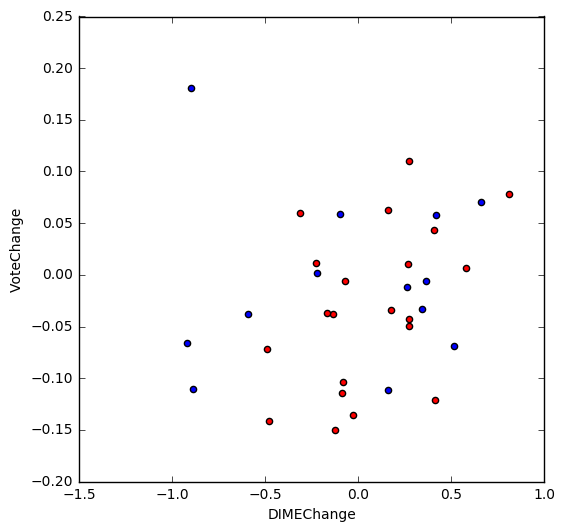

In [6]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
vote.loc[vote.Opp == "N"].plot.scatter('DIMEChange', 'VoteChange', color="blue", ax=ax)
vote.loc[vote.Opp == "Y"].plot.scatter('DIMEChange', 'VoteChange', color="red", ax=ax)

### Figure 1
A scatter plot showing how the vote changes from the primary to the general election based on the difference in the DIME score of the two candidates. There is a definite outlier in the top left which goes in the opposite direction from what is expected.

In [7]:
import statsmodels.api as sm
model = sm.OLS(vote.loc[vote.Opp == "Y"].VoteChange, sm.add_constant(vote.loc[vote.Opp == "Y"].DIMEChange)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VoteChange   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     4.342
Date:                Thu, 15 Jun 2017   Prob (F-statistic):             0.0509
Time:                        05:48:28   Log-Likelihood:                 26.598
No. Observations:                  21   AIC:                            -49.20
Df Residuals:                      19   BIC:                            -47.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0383      0.016     -2.397      0.027        -0.072    -0.005
DIMEChange     0.0988      0.047      2.084      0.051        -0.000     0.198
==============================================================================
Omnibus:                        0.300   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.470
Skew:                           0.095   Prob(JB):                        0.790
Kurtosis:                       2.292   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model = sm.OLS(vote.loc[vote.Opp == "N"].VoteChange, sm.add_constant(vote.loc[vote.Opp == "N"].DIMEChange)).fit()
model.summary()

/home/scott/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VoteChange   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                  0.002522
Date:                Thu, 15 Jun 2017   Prob (F-statistic):              0.961
Time:                        05:50:45   Log-Likelihood:                 14.601
No. Observations:                  13   AIC:                            -25.20
Df Residuals:                      11   BIC:                            -24.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0057      0.024     -0.240      0.815        -0.058     0.047
DIMEChange     0.0021      0.043      0.050      0.961        -0.092     0.096
==============================================================================
Omnibus:                        2.910   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.259
Skew:                           0.756   Prob(JB):                        0.533
Kurtosis:                       3.195   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results are not quite significant, but take a look at the outlier.

In [11]:
vote.loc[(vote.VoteChange > .15) & (vote.DIMEChange < .5)]

,Year,Office,District,Party,Cand1,Cand2,General1,General2,Primary1,Primary2,DIME1,DIME2,GenShare,PriShare,VoteChange,DIMEChange
33,2014,Reps,35,DEM,Christina Gagnier,Norma J Torres,22753,39502,4081,17996,-1.61,-0.72,0.365481,0.184853,0.180628,-0.89


Looking at the election for Congressional District 35 in 2014, there was no Republican on the ballot in the primary, although there was a Republican write-in. This would explain why the moderate did not improve in the general election. He could have gained nearly all of the Republican votes in the primary and the liberal Democratic votes could have consolidated around his opponent. Try the regression again without this outlier.

In [13]:
wooutlie = vote.loc[(vote.VoteChange < .15) | (vote.DIMEChange > -.5)]
model_nooutlie = sm.OLS(wooutlie.VoteChange, sm.add_constant(wooutlie.DIMEChange)).fit()
model_nooutlie.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VoteChange   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     8.426
Date:                Thu, 06 Apr 2017   Prob (F-statistic):            0.00636
Time:                        20:05:13   Log-Likelihood:                 45.941
No. Observations:                  37   AIC:                            -87.88
Df Residuals:                      35   BIC:                            -84.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0218      0.012     -1.835      0.075        -0.046     0.002
DIMEChange     0.0730      0.025      2.903      0.006         0.022     0.124
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.954
Skew:                           0.030   Prob(JB):                        0.621
Kurtosis:                       2.216   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Substantial improvement. Should look to see if there are other elections in which only one party was represented in the primary.

Now try to examine the effect of primary vote share going to the opposite party.

In [9]:
vote.columns

Index([u'Year', u'OType', u'District', u'Party', u'Cand1', u'Cand2', u'Gen1',
       u'Gen2', u'Pri1', u'Pri2', u'Opp', u'PriTotal', u'PriOpp', u'DIME1',
       u'DIME2', u'GenShare', u'PriShare', u'VoteChange', u'DIMEChange',
       u'OppShare', u'OppDime'],
      dtype='object')

In [13]:
vote.columns[10:]

Index([u'Opp', u'PriTotal', u'PriOpp', u'DIME1', u'DIME2', u'GenShare',
       u'PriShare', u'VoteChange', u'DIMEChange', u'OppShare', u'OppDime'],
      dtype='object')

In [14]:
vote2 = vote[vote.columns[10:]]
vote2.loc[vote2.VoteChange < 0, "DIMEChange"] *= -1
vote2.loc[vote2.VoteChange < 0, "OppDime"] *= -1
vote2.loc[vote2.VoteChange < 0, "VoteChange"] *= -1
vote2.head(5)

/home/scott/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Opp,PriTotal,PriOpp,DIME1,DIME2,GenShare,PriShare,VoteChange,DIMEChange,OppShare,OppDime
0,Y,120845,31120,0.297,0.572,0.655854,0.545668,0.110186,0.275,25.751996,-7.081799
1,Y,102287,31721,0.389,0.548,0.522947,0.460401,0.062546,0.159,31.011761,-4.930870
2,Y,106351,22708,-0.992,-0.503,0.488195,0.559498,0.071303,0.489,21.351938,10.441098
3,Y,62290,9082,-0.933,-1.204,0.504801,0.554012,0.049211,-0.271,14.580189,-3.951231
4,Y,68144,11646,-0.887,-0.862,0.583800,0.719391,0.135591,0.025,17.090279,0.427257


In [20]:
model = sm.OLS(vote.VoteChange, sm.add_constant(vote[["OppShare","DIMEChange","OppDime"]])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VoteChange   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7538
Date:                Thu, 15 Jun 2017   Prob (F-statistic):              0.529
Time:                        06:43:36   Log-Likelihood:                 39.817
No. Observations:                  34   AIC:                            -71.63
Df Residuals:                      30   BIC:                            -65.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0093      0.021     -0.450      0.656        -0.051     0.033
OppShare      -0.0009      0.001     -0.929      0.360        -0.003     0.001
DIMEChange     0.0335      0.032      1.034      0.310        -0.033     0.100
OppDime       -0.0015      0.002     -0.722      0.476        -0.006     0.003
==============================================================================
Omnibus:                        3.004   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.872
Skew:                           0.543   Prob(JB):                        0.392
Kurtosis:                       3.379   Cond. No.                         49.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vote.sort?